In [111]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [112]:
os.getcwd()

'C:\\Users\\Adhya\\Desktop'

In [113]:
data=pd.read_csv("day.csv")

In [114]:
data.shape

(731, 16)

In [115]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [116]:
data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [117]:
data=data.rename(columns={'dteday':"datetime",'yr':'year','mnth':'month','hum':'humidity','cnt':'count'})

In [118]:
data['season']=data['season'].astype('category')

In [119]:
data=data.rename(columns={'weathersit':'weather'})

In [120]:
data['year'] = data['year'].astype('category')
data['month'] = data['month'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weather'] = data['weather'].astype('category')

In [121]:
data.dtypes

instant          int64
datetime        object
season        category
year          category
month         category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

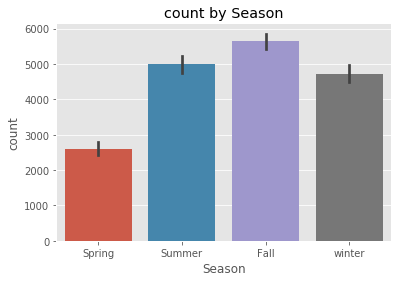

In [122]:
fig, ax = plt.subplots()
sns.barplot(data=data[['season','count']],
            x='season',
            y='count',
            ax=ax)

plt.title('count by Season')
plt.ylabel('count')
plt.xlabel('Season')

tick_val=[0, 1, 2, 3]
tick_lab=['Spring','Summer','Fall',"winter"]
plt.xticks(tick_val, tick_lab)

plt.show()




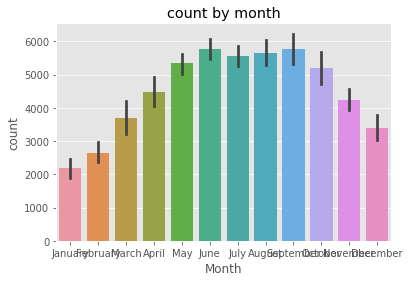

In [123]:
fig, ax = plt.subplots()
sns.barplot(data=data[['month','count']], x='month', y='count', ax=ax)

plt.title('count by month')
plt.ylabel('count')
plt.xlabel('Month')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.show()

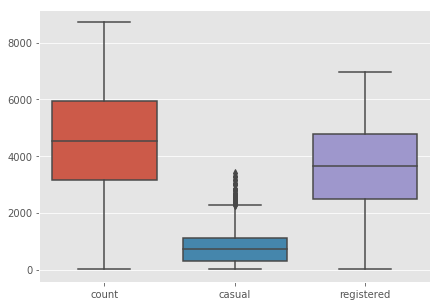

In [124]:
fig = plt.subplots(figsize=(7,5))
sns.boxplot(data=data[['count', 'casual', 'registered']])

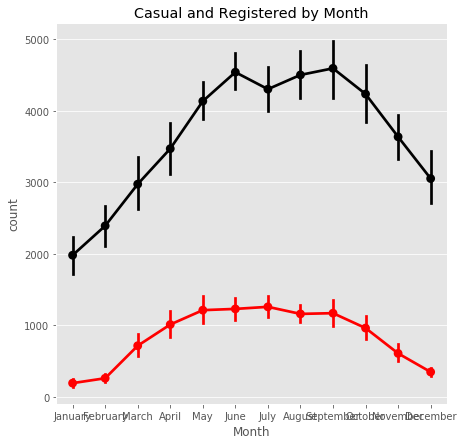

In [125]:
 
fig, ax = plt.subplots(figsize=(7,7))
sns.pointplot(data=data[['month', 'casual', 'registered']],
              x='month',
              y='casual',
              ax=ax,
              color='red')

sns.pointplot(data=data[['month', 'casual', 'registered']],
              x='month',
              y='registered',
              ax=ax,
              color='black')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.title('Casual and Registered by Month')
plt.ylabel('count')
plt.xlabel('Month')

plt.show()

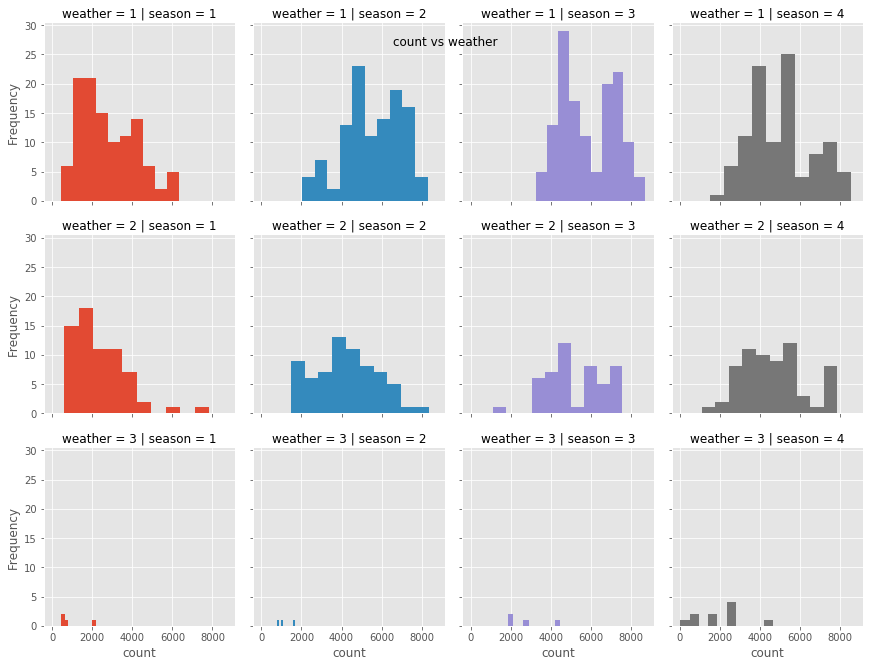

In [126]:
plot= sns.FacetGrid(data=data,
               col='season',
               row='weather',hue='season')
plot.map(plt.hist,'count')

plt.subplots_adjust(top=1.0)
plot.fig.suptitle('count vs weather')

plot.set_xlabels('count')
plot.set_ylabels('Frequency')

plt.show()

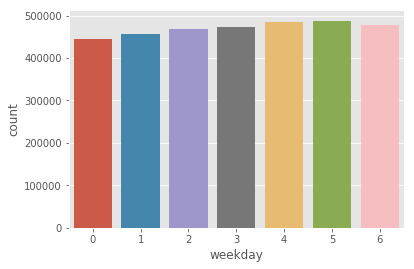

In [127]:
by_week = data.groupby(['weekday'])['count'].sum().reset_index()
ax = sns.barplot(x = by_week['weekday'], y = by_week['count'])
ax.set(xlabel='weekday', ylabel='count')
plt.show()

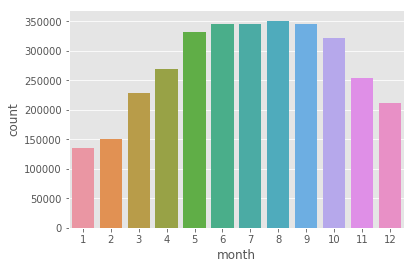

In [128]:
by_month = data.groupby(['month'])['count'].sum().reset_index()
ax = sns.barplot(x = by_month['month'], y = by_month['count'])
ax.set(xlabel='month', ylabel='count')
plt.show()

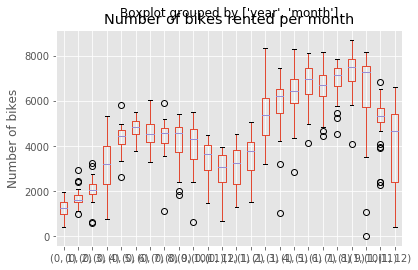

In [129]:
plt.style.use('ggplot')

data.boxplot(column='count', by=['year','month'])

plt.title('Number of bikes rented per month')
plt.xlabel('')

plt.ylabel('Number of bikes')

plt.show()

In [130]:
data.dtypes

instant          int64
datetime        object
season        category
year          category
month         category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [131]:
data.head(4)

,instant,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562


In [132]:
## checking for missing values

data.isnull().sum()

instant       0
datetime      0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [133]:
## checking for outliers
data.columns


Index(['instant', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [134]:
# saving numeric variables
cnames=['temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count']

In [135]:
q75,q25= np.percentile(data['humidity'], [75,25])


In [136]:
iqr=q75-q25

min=q25-(iqr*1.5)
max=q75+(iqr*1.5)

data=data.drop(data[data['humidity']<min].index)
data=data.drop(data[data['humidity']>max].index)

In [137]:
q75,q25= np.percentile(data['windspeed'], [75,25])


In [138]:
iqr=q75-q25

min=q25-(iqr*1.5)
max=q75+(iqr*1.5)

data=data.drop(data[data['windspeed']<min].index)
data=data.drop(data[data['windspeed']>max].index)

# Feature selection


In [139]:
# corelation analysis

dt_corr=data.loc[:,cnames]

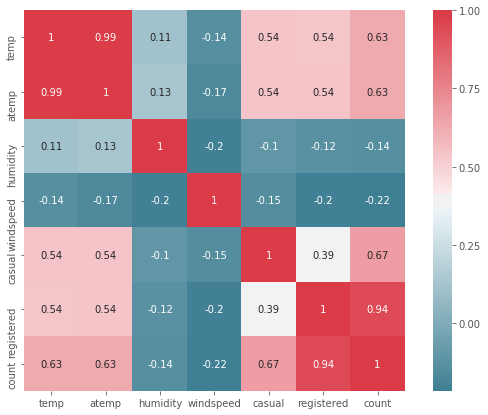

In [140]:
# set width and hight of the plot

f,ax=plt.subplots(figsize=(10,7))

#generating corr plot

corr=dt_corr.corr()

# plot using seaborn lib

sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),annot=True,cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [141]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [142]:
aov=ols('count~season+year+month+holiday+weekday+workingday+weather',data=data).fit()

In [143]:
aov_table=sm.stats.anova_lm(aov,typ=2)

In [144]:
aov_table

,sum_sq,df,F,PR(>F)
season,6.016829e+07,3.0,27.932402,4.657045e-17
year,8.207669e+08,1.0,1143.093310,1.084247e-148
month,1.689411e+08,11.0,21.389688,1.201107e-37
holiday,5.037653e+05,1.0,0.701601,4.025355e-01
weekday,1.627039e+07,6.0,3.776665,1.041289e-03
workingday,1.692268e+07,1.0,23.568442,1.491215e-06
weather,1.840712e+08,2.0,128.179217,4.407782e-48
Residual,4.968717e+08,692.0,NaN,NaN


In [145]:
# droping the variables which are not carrying useful information

data=data.drop(['instant','datetime','holiday','casual','registered','temp'],axis=1)

In [146]:
data.shape

(717, 10)

In [147]:
###### as the given data is normalized so we are not applying feature scaling


In [148]:
dep=data['count']

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( data, dep, test_size=0.3, random_state=42)

In [150]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [151]:
#Random forest
from sklearn.ensemble import RandomForestRegressor


In [155]:
rf_mod=RandomForestRegressor(n_estimators=500).fit(x_train,np.log1p(y_train))

In [156]:
pred=rf_mod.predict(x_test)

In [157]:
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(y_test)),np.exp(pred),False))

RMSLE Value For Random Forest:  0.21223090975589853


In [158]:
# results
# if number of trees =100
# RMSLE = 0.211

# if number of trees =500

#RMSLE = 0.212

In [159]:
## Decision tree
from sklearn.tree import DecisionTreeRegressor
dt_mod=DecisionTreeRegressor(max_depth=2).fit(x_train,np.log1p(y_train))


In [160]:
cn=['season', 'year', 'month', 'weekday', 'workingday', 'weather', 'atemp',
       'humidity', 'windspeed', 'count']

In [161]:
dt_pred=dt_mod.predict(x_test)

In [162]:
print ("RMSLE value For decision tree: ",rmsle(np.exp(np.log1p(y_test)),np.exp(dt_pred),False))

RMSLE value For decision tree:  0.29425921693804546


In [163]:
from sklearn import tree
dotfile=open("dt.dot",'w')
df = tree.export_graphviz(dt_mod, out_file=dotfile, feature_names =cn)

In [164]:
from sklearn.linear_model import LinearRegression


In [165]:
# linear regression

lm_mod=LinearRegression().fit(X = x_train,y =np.log1p(y_train))

In [166]:
lm_pred = lm_mod.predict(x_test)

In [167]:
rmsle(np.exp(np.log1p(y_test)),np.exp(lm_pred),False)

0.3034264294138558

In [168]:
print ("RMSLE Value For Linear Regression : ",rmsle(np.exp(np.log1p(y_test)),np.exp(lm_pred),False))

RMSLE Value For Linear Regression :  0.3034264294138558


In [169]:
from sklearn.ensemble import GradientBoostingRegressor

gbm=GradientBoostingRegressor(n_estimators=100,alpha=0.01).fit(X = x_train,y = np.log1p(y_train))


In [170]:
preds = gbm.predict(X= x_test)

rmsle(np.exp(np.log1p(y_test)),np.exp(preds),False)


0.19776706955756146

In [171]:
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(np.log1p(y_test)),np.exp(preds),False))


RMSLE Value For Gradient Boost:  0.19776706955756146


In [172]:
## support vector regressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [173]:
sv=SVR().fit(x_train,y_train)

In [174]:
svr_prd=sv.predict(x_test)

In [175]:
rmsle=np.sqrt(mean_squared_log_error(svr_prd,y_test))

In [176]:
rmsle

0.6429634982137709

In [177]:
print('RMSLE value for svr regressor :',rmsle)

RMSLE value for svr regressor : 0.6429634982137709


In [178]:
# knn
from sklearn.neighbors import KNeighborsRegressor

In [179]:
knn=KNeighborsRegressor(n_neighbors=9).fit(x_train,y_train)

In [180]:
knn_prd=knn.predict(x_test)

In [181]:
rmsle=np.sqrt(mean_squared_log_error(knn_prd,y_test))

In [182]:
rmsle

0.22516591154703952

In [183]:
print('RMSLE value for knn regressor :',rmsle)

RMSLE value for knn regressor : 0.22516591154703952


In [184]:
## results of KNN

# if k(n nearest neighbors)=1
# RMSLE = 0.199

# if k(n nearest neighbors)=3
# RMSLE = 0.203

# if k(n nearest neighbors)=5
# RMSLE = 0.212

# if k(n nearest neighbors)=7
# RMSLE = 0.219

# if k(n nearest neighbors)=9
# RMSLE = 0.225